# An introduction to Chaos 

In class we talk about the [_Butterfly Effect_](https://en.wikipedia.org/wiki/Butterfly_effect), the definition of [_Chaos_](https://en.wikipedia.org/wiki/Chaos_theory), and [_Strange attractors _](http://www.stsci.edu/~lbradley/seminar/attractors.html). 
We also talked about [attractors](https://en.wikipedia.org/wiki/Attractor) and tried to illustrate the idea of strange attractors through diagrams of [Lorenz System](http://mathworld.wolfram.com/LorenzAttractor.html). A illustration of the [phase-space](https://en.wikipedia.org/wiki/Phase_space) trajectory of the Lorenz system were also [discussed](https://en.wikipedia.org/wiki/Lorenz_system).  

## Simulating the Lorenz System 
In Julia the Lorenz system can be simulated using the [ODE.jl package](https://github.com/JuliaDiffEq/ODE.jl/blob/master/examples/Lorenz_Attractor.ipynb) that we used earlier. 

In [1]:
using ODE;
function f(t, r)
    # Extract the coordinates from the r vector
    (x, y, z) = r
    
    # The Lorenz equations
    dx_dt = σ*(y - x)
    dy_dt = x*(ρ - z) - y
    dz_dt = x*y - β*z
    
    # Return the derivatives as a vector
    [dx_dt; dy_dt; dz_dt]
end;
# Define time vector and interval grid
const dt = 0.001
const tf = 100.0
t = 0:dt:tf

In [2]:
# Initial position in space
r0 = [0.1; 0.0; 0.0]

# Constants sigma, rho and beta
σ = 10.0
ρ   = 28.0
β   = 8.0/3.0;
(t, pos) = ode45(f, r0, t)
x = map(v -> v[1], pos)
y = map(v -> v[2], pos)
z = map(v -> v[3], pos);

In the above we calculated the trajectory of the system. We will use that for most of the plot. 

In [3]:
# Slightly modifed intial conditions 
r0 = [0.1; 0.01; 0.0]

# Constants sigma, rho and beta
σ = 10.0
ρ   = 28.0
β   = 8.0/3.0;
(t_new, pos) = ode45(f, r0, t)
x_new = map(v -> v[1], pos)
y_new = map(v -> v[2], pos)
z_new = map(v -> v[3], pos);

Here we calculate the trajectory of a slightly perturbed initial conditions $r_0$.

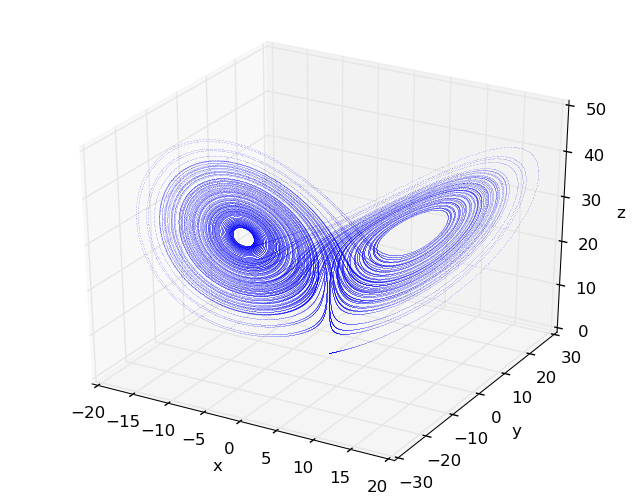

In [4]:
using PyPlot
plot3D(x, y, z,".",markersize=0.1);
xlabel("x")
ylabel("y")
zlabel("z");

Seeing the same plot through a number of 2-D projections

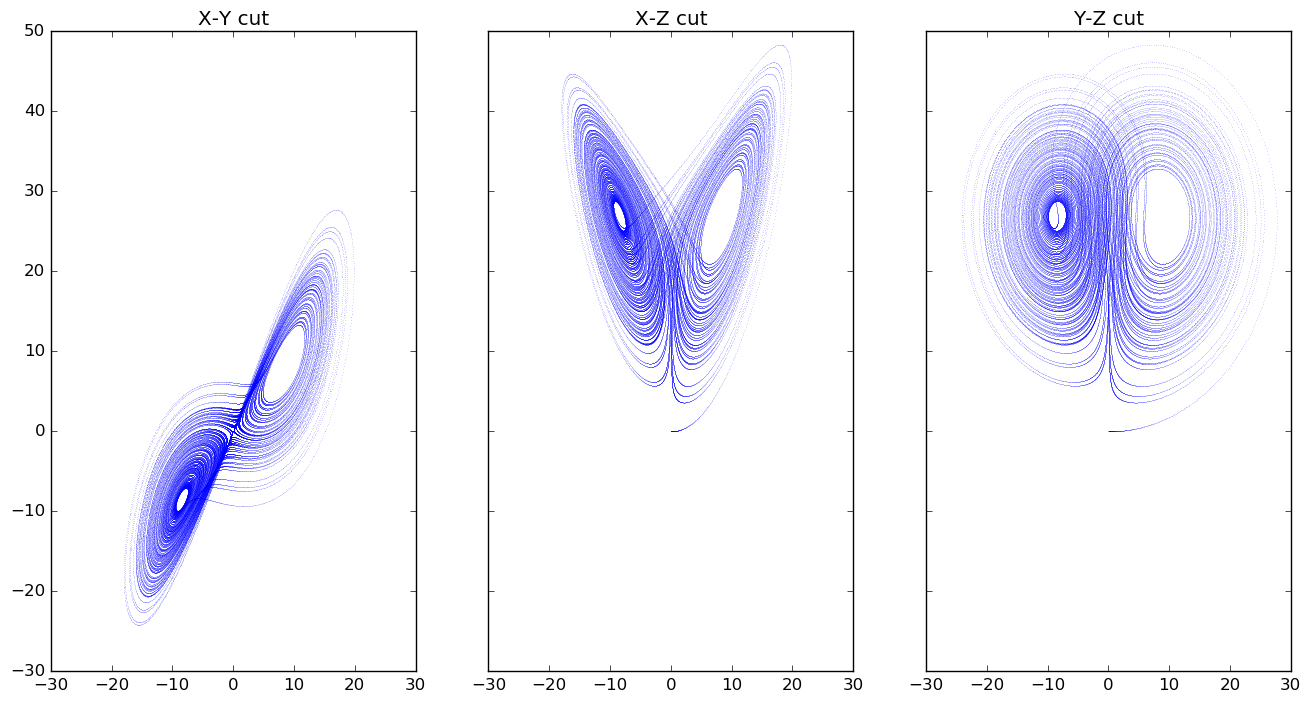

In [5]:
fig, ax = subplots(1, 3, sharex=true, sharey=true, figsize=(16,8))

ax[1][:plot](x, y,".",markersize=0.1)
ax[1][:set_title]("X-Y cut")

ax[2][:plot](x, z,".",markersize=0.1)
ax[2][:set_title]("X-Z cut")

ax[3][:plot](y, z,".",markersize=0.1)
ax[3][:set_title]("Y-Z cut");


The trajectory of the systems seems to have structure. However, if were to look at the time series throw any of the problem dimensions, it is harder to see a pattern. 

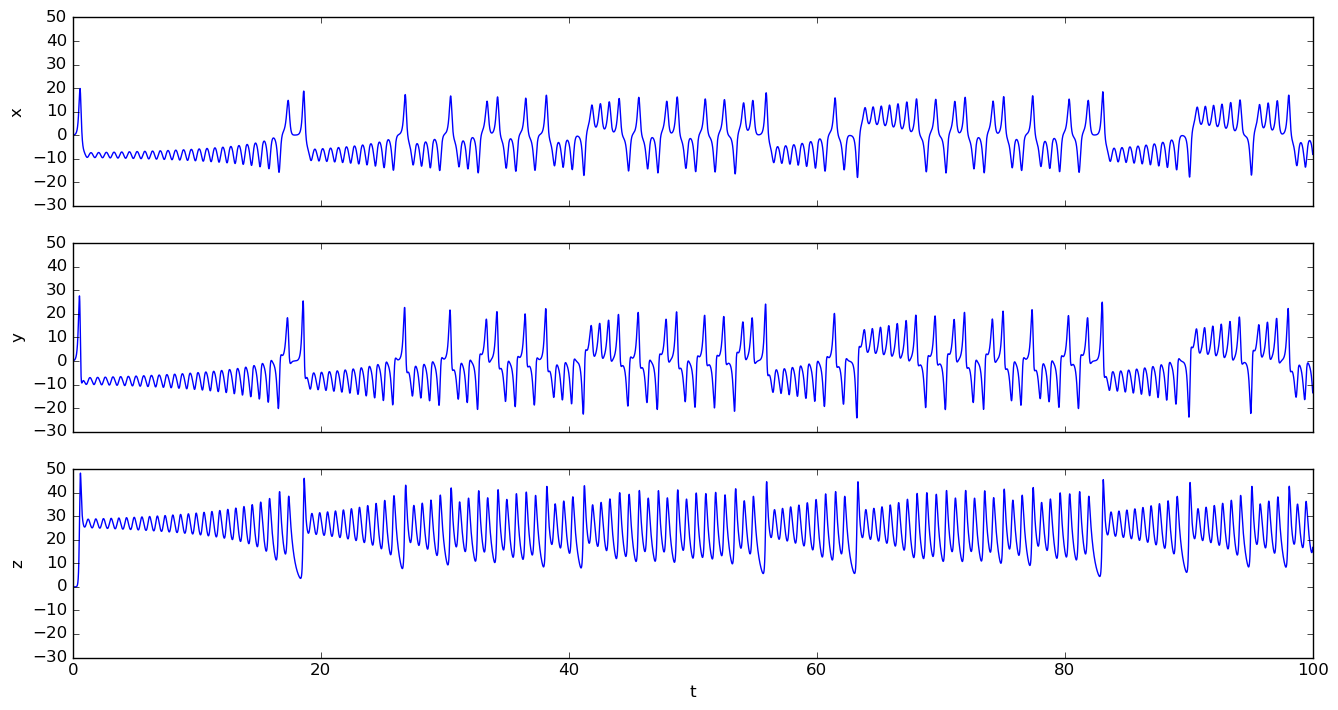

In [6]:
figure(figsize=(10,3))
fig, ax = subplots(3, 1, sharex=true, sharey=true, figsize=(16,8))
ax[1][:plot](t,x)
ax[1][:set_ylabel]("x")
ax[2][:plot](t,y)
ax[2][:set_ylabel]("y")
ax[3][:plot](t,z)
ax[3][:set_ylabel]("z")

xlabel("t");

Comparing the original system with a slightly perturbed one. 

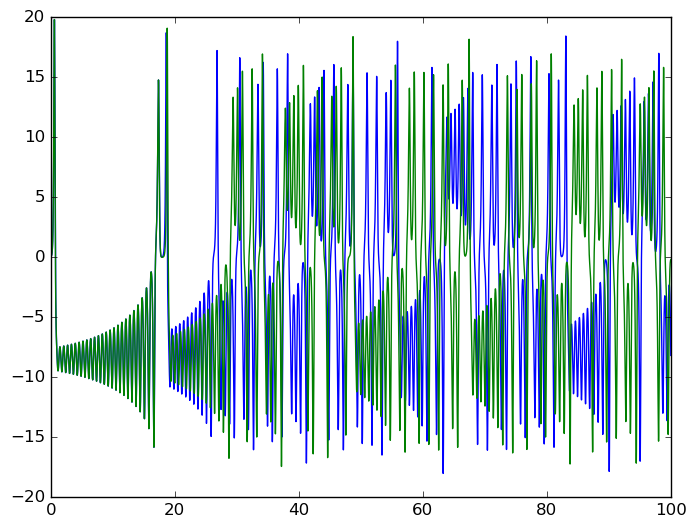

In [7]:
plot(t,x,t_new,x_new);

They start similar and the diverge _exponentially_ in time. 

If we change the value of $\rho$ below 24. The system will evolve towards a single [fixed-point](https://en.wikipedia.org/wiki/Attractor#Fixed_point)

In [8]:
ρ=14
(t, pos) = ode45(f, r0, t)
x = map(v -> v[1], pos)
y = map(v -> v[2], pos)
z = map(v -> v[3], pos);

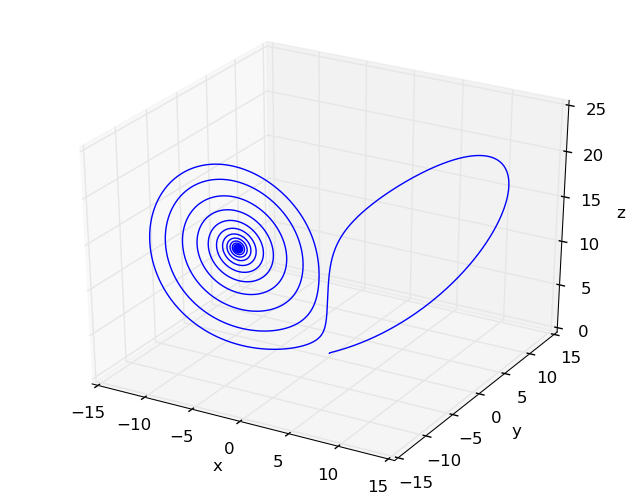

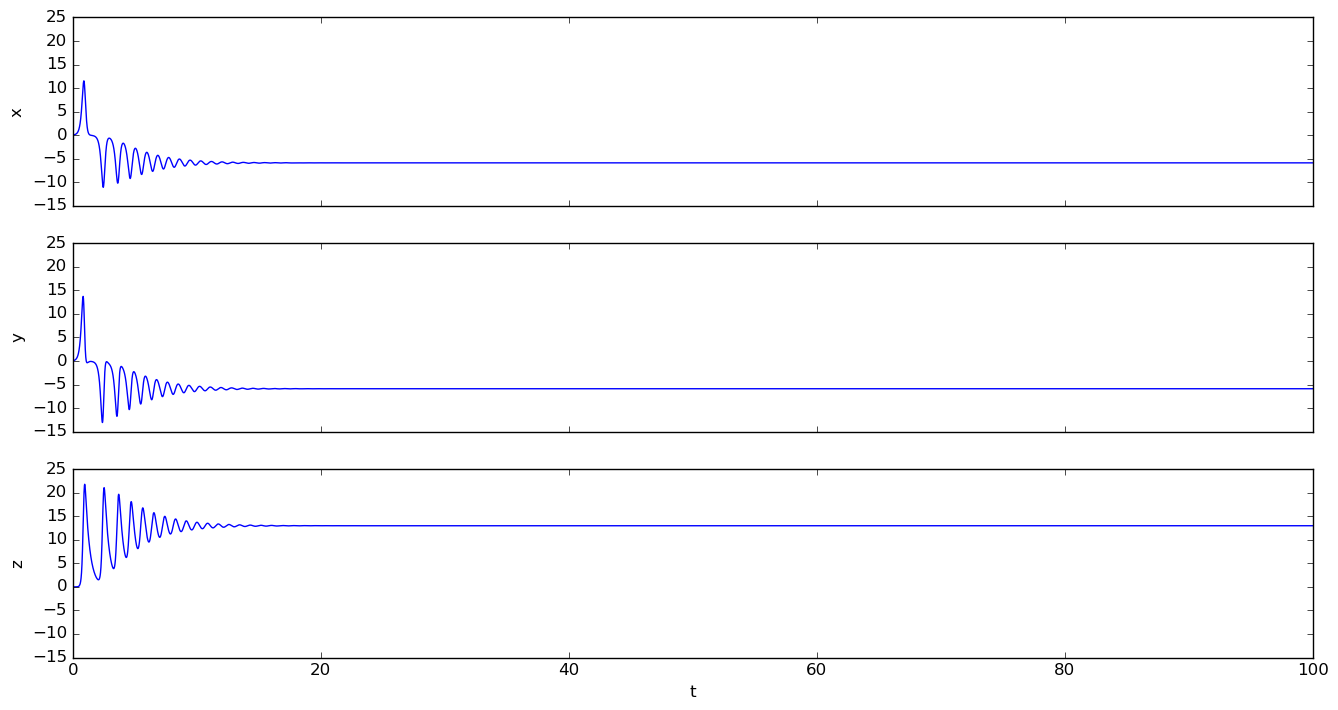

In [9]:
plot3D(x, y, z);
xlabel("x")
ylabel("y")
zlabel("z");
figure(figsize=(10,3))
fig, ax = subplots(3, 1, sharex=true, sharey=true, figsize=(16,8))
ax[1][:plot](t,x)
ax[1][:set_ylabel]("x")
ax[2][:plot](t,y)
ax[2][:set_ylabel]("y")
ax[3][:plot](t,z)
ax[3][:set_ylabel]("z")

xlabel("t");

## The Henon map

The [Henon map](https://en.wikipedia.org/wiki/H%C3%A9non_map), is a somewhat simpler example of a Chaotic system. 
$$\begin{cases}x_{n+1} = 1-a x_n^2 + y_n\\y_{n+1} = b x_n.\end{cases}$$

In [10]:
# Our equations
x_n(x,y)=1-a*x^2+y
y_n(x)=b*x;

In [11]:
# System constants 
a=1.4
b=0.3;

In [12]:
x_0=0.5
y_0=0.5
n_iter=1000
x_hist=Array(Float64,n_iter)
y_hist=Array(Float64,n_iter)
x_hist[1]=x_0
y_hist[1]=y_0
for i=2:n_iter
    x_hist[i]=x_n(x_hist[i-1],y_hist[i-1])
    y_hist[i]=y_n(x_hist[i-1])
end

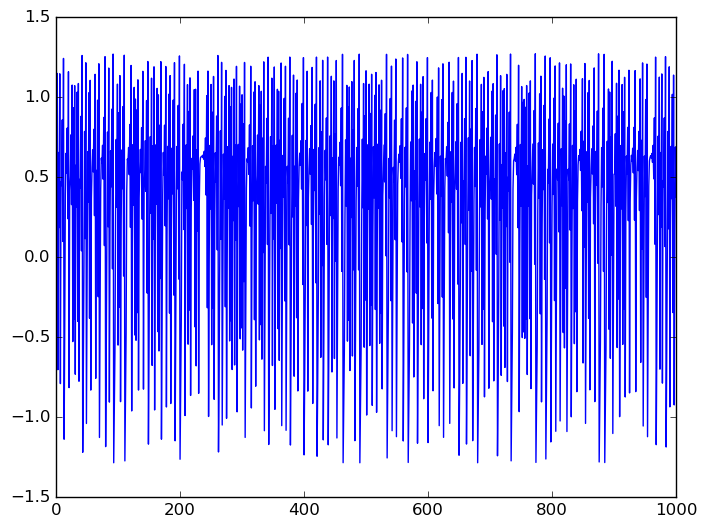

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f998fe27a50>

In [13]:
plot(1:n_iter,x_hist)


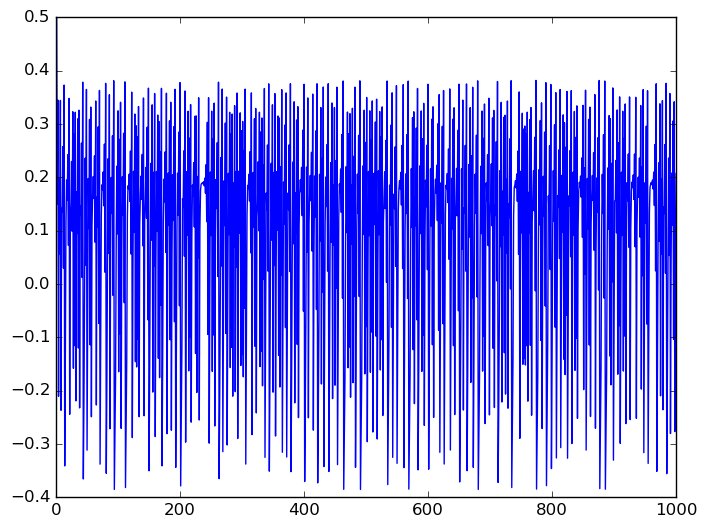

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f998ffadb90>

In [14]:
plot(1:n_iter,y_hist)


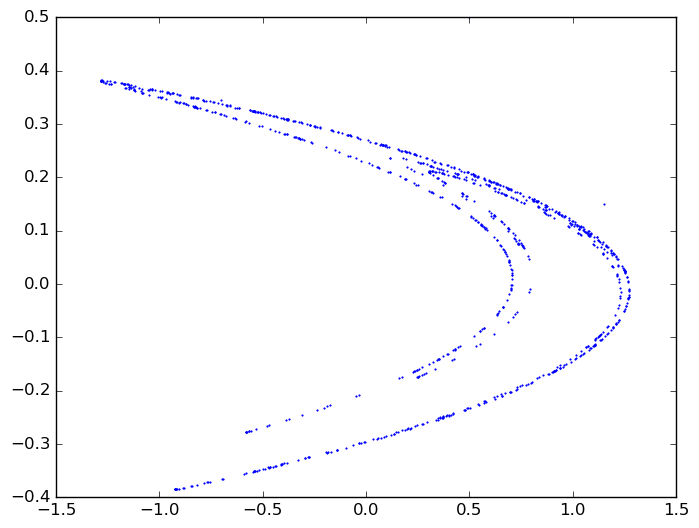

In [15]:
plot(x_hist,y_hist,".",markersize=2);

We change to parameters to get a periodic attractor around a [fixed number of points](https://en.wikipedia.org/wiki/Attractor#Finite_number_of_points) on phase space. 

In [16]:
# System constants 
a=1.01
b=0.3;
x_0=0.5
y_0=0.5
n_iter=1000
x_hist=Array(Float64,n_iter)
y_hist=Array(Float64,n_iter)
x_hist[1]=x_0
y_hist[1]=y_0
for i=2:n_iter
    x_hist[i]=x_n(x_hist[i-1],y_hist[i-1])
    y_hist[i]=y_n(x_hist[i-1])
end

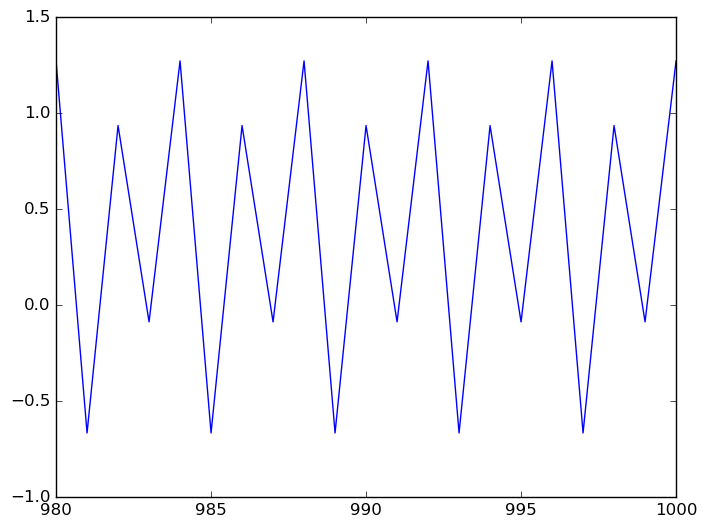

In [17]:
plot(1:n_iter,x_hist)
axis([980 1000 -1 1.5 ]');

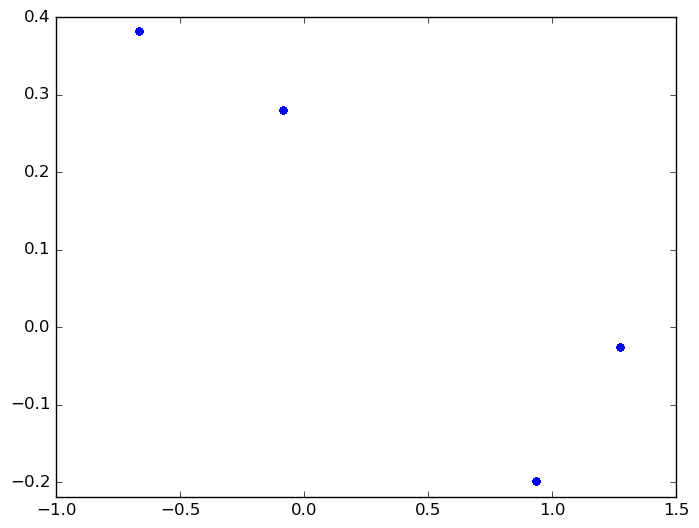

In [18]:
plot(x_hist[end-100:end],y_hist[end-100:end],".",markersize=10);
axis([-1 1.5 -0.22 0.4]');

Looking at the last 100 points,_after the system as settled down and the transients eliminated_, we see that we have four fixed points.  